In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [68]:
data = pd.read_csv("VIX_data.csv")

In [69]:
data.head()

,Date,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,...,USD INDEX Open,USD INDEX High,USD INDEX Low,USD INDEX Close,USD INDEX Adj Close,VXN Open,VXN High,VXN Low,VXN Close,VXN Adj Close
0,2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,1934.745,16.530,...,85.910004,87.129997,84.470001,86.879997,86.879997,18.260000,31.170000,15.310000,15.810000,15.810000
1,2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,13.330,...,87.080002,88.440002,86.879997,88.360001,88.360001,15.740000,17.180000,13.480000,14.740000,14.740000
2,2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,15.155,...,88.230003,90.330002,87.629997,90.269997,90.269997,14.740000,24.080000,14.300000,19.639999,19.639999
3,2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,19.455,...,90.360001,95.480003,90.330002,94.800003,94.800003,19.730000,23.700001,16.389999,21.590000,21.590000
4,2015-04-01,5.4,236.222,0.02,0.09,1.94,0.12,3.41,2097.290,13.300,...,98.419998,99.989998,94.400002,94.599998,94.599998,17.360001,18.639999,13.510000,16.510000,16.510000


In [70]:
data['Date'] = pd.to_datetime(data['Date'])
data_clean = data
data_clean.fillna(data_clean.mean(), inplace=True)

In [71]:
X = data_clean.drop(columns=['VIX','Date'])
y = data_clean['VIX']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
y_pred = rf_model.predict(X_test)

In [74]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

2.0405285673488325

In [75]:
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

In [76]:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

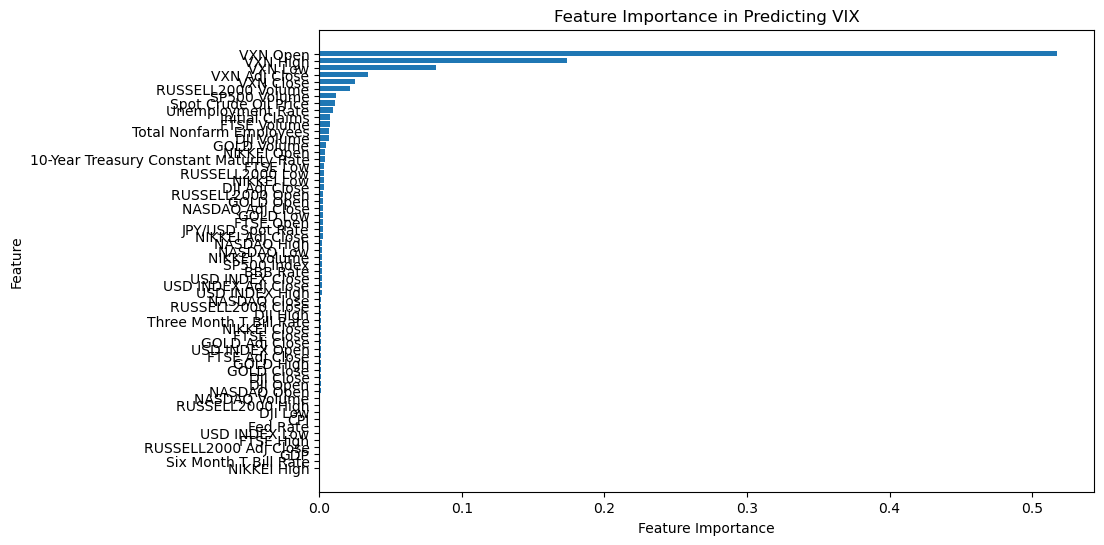

In [77]:
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting VIX')
plt.gca().invert_yaxis()
plt.show()

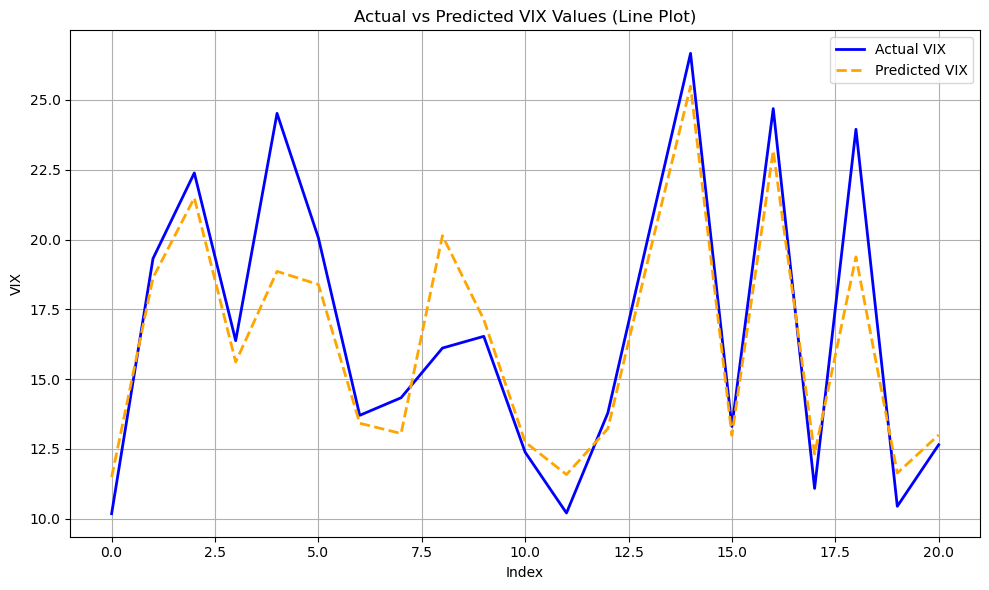

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual VIX', color='blue', linewidth=2)
plt.plot(range(len(y_test)), y_pred, label='Predicted VIX', color='orange', linestyle='dashed', linewidth=2)
plt.xlabel('Index')
plt.ylabel('VIX')
plt.title('Actual vs Predicted VIX Values (Line Plot)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()